INFO-5717-Assignment-four-code

# Assignment 4 starts here:

In [11]:
pip install GetOldTweets3

Note: you may need to restart the kernel to use updated packages.


# Question 1 starts below:

In [12]:
import json 
from tweepy import OAuthHandler
from tweepy import Stream
from tweepy import API
from tweepy import Cursor
from tweepy.streaming import StreamListener
import datetime
import sys
import numpy as np
import GetOldTweets3 as got


import mysql.connector as mysql
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.dates as date
import pandas as pd

## Solution 1.1 & 1.2

In [13]:
# Drop table twitter_users_assign if it exists in mysql database

'''
    DROP TABLE `twitter_users_assign`;  
'''

# Create table twitter_user_assign using mysql database

'''
    CREATE TABLE `twitter_users_assign` (
     `id` int(11) NOT NULL AUTO_INCREMENT, 
     `screen_name` varchar(100) DEFAULT NULL,
     `user_name` varchar(100) DEFAULT NULL,
     `user_location` varchar(128) DEFAULT NULL,
     `user_description` varchar(250) DEFAULT NULL,
     `no_of_follows` int(250) DEFAULT 0,
     `no_of_friends` int(250) DEFAULT 0,
     `no_of_statuses` int(250) DEFAULT 0,
     `user_url` varchar(250) DEFAULT NULL,
     PRIMARY KEY (`id`)
    ); 
'''

# Insert into table
'''
    INSERT INTO `twitter_users_assign` 
      (screen_name,user_name,user_location,
       user_description,no_of_follows,no_of_friends,no_of_statuses,user_url)
    VALUES (%s, %s, %s, %s,%s, %s, %s, %s);
    
'''

'\n    INSERT INTO `twitter_users_assign` \n      (screen_name,user_name,user_location,\n       user_description,no_of_follows,no_of_friends,no_of_statuses,user_url)\n    VALUES (%s, %s, %s, %s,%s, %s, %s, %s);\n    \n'

## Solution 1.1 & 1.2 continued

In [14]:
# The user IDs below are Bill Gates, Michelle Obama, Ellen DeGeneres, Beyonce, Jennifer Lopez, Justin Bieber, Drake, 
# Lady Gaga, Barrack Obama, and Joe Biden respectively.

user_ids = [50393960,409486555,15846407,31239408,85603854,27260086,27195114,14230524,813286,939091]


dropTableQuery = "DROP TABLE IF EXISTS `twitter_users_assign`"

createTableQuery = "CREATE TABLE `twitter_users_assign` ( `id` int(11) NOT NULL AUTO_INCREMENT, `screen_name` varchar(255) CHARACTER SET utf8 COLLATE utf8_general_ci DEFAULT NULL,`user_name` varchar(255) CHARACTER SET utf8 COLLATE utf8_general_ci  DEFAULT NULL,`user_location` varchar(255) CHARACTER SET utf8 COLLATE utf8_general_ci DEFAULT NULL,  `user_description` varchar(255) CHARACTER SET utf8 COLLATE utf8_general_ci DEFAULT NULL,`no_of_follows` int(255) DEFAULT 0,`no_of_friends` int(255) DEFAULT 0,`no_of_statuses` int(250) DEFAULT 0,`user_url` varchar(250) DEFAULT NULL,PRIMARY KEY (`id`)) CHARACTER SET utf8 COLLATE utf8_unicode_ci;" 
insert_query = "INSERT INTO twitter_users_assign (screen_name,user_name,user_location,user_description,no_of_follows,no_of_friends,no_of_statuses,user_url) VALUES (%s, %s, %s, %s,%s, %s, %s, %s);"

# Tweeter API Credentials
CONSUMER_KEY = "u7L1lnR7HN85dn1qnTFO1cegb"
CONSUMER_SECRET = "QN1JrEmit2To46ZcwWAT4aI5QGWZXWRDDUPnMCWV5M66SFc8wT"
ACCESS_TOKEN = "1144377060036620294-BSEicX3zH7hIhksbNZV9mrWFwa07cO"
ACCESS_TOKEN_SECRET = "gxWMOodDq1nQAjix9mHEOUSAtgE7XH5ctHInm0XRslJce"
 
#Database Credentials
HOST = "localhost"
USER = "root"
PASSWD = "Atolagbe"
DATABASE = "mysql"


In [15]:
# AUNTENTICATE USER ON TWITTER API USING TWEEPY 
def authenticate(api_key, secret_key, access_token, secret_token):

    auth = OAuthHandler(api_key, secret_key)
    auth.set_access_token(access_token, secret_token)
    api = API(auth, 
                     wait_on_rate_limit=True, 
                     wait_on_rate_limit_notify=True)
  
    return api

In [16]:
# GET tWITTER USER DATA GIVEN USER_ID: 
def get_user_data(user_id):
        data = api.get_user(user_id)
        return data


In [17]:
api = authenticate(CONSUMER_KEY,CONSUMER_SECRET,ACCESS_TOKEN,ACCESS_TOKEN_SECRET)


try:
    db_connection=mysql.connect(host=HOST, user=USER, passwd=PASSWD, db=DATABASE)
    sql = "ALTER DATABASE "+DATABASE+ " CHARACTER SET 'utf8' COLLATE 'utf8_unicode_ci';"
    cursor = db_connection.cursor()
    cursor.execute(sql)
    cursor.execute(dropTableQuery)
    cursor.execute(createTableQuery)



    for user_id in user_ids:        
        data = get_user_data(user_id)

        #grab the wanted data from the Tweet TO INSERT INTO DB
        screen_name = data.screen_name
        user_name = data.name
        user_location = data.location            
        user_description = data.description 
        no_of_follows = data.followers_count  
        no_of_friends = data.friends_count  
        no_of_statuses = data.statuses_count 
        user_url = data.url  

        #Insert into db
        cursor.execute(insert_query, (screen_name,user_name,user_location,user_description,no_of_follows,no_of_friends,no_of_statuses,user_url))
        
    db_connection.commit()
    print('Successful')
finally:
    
    cursor.close()
    db_connection.close()

Successful


## Solution 1.3

In [18]:
# Get the network of user users
def get_network(user):
    
    # we obtain friends from user
    friends = user.friends()
    
    # The friends_network
    friends_network = set()    
    
    for friend in friends:
        friends_network.add((user.name,friend.name))
    
    # we obtain friends from user 
    followers = user.followers() 
    
    # The followers_network
    followers_network = set() 
    
    for follower in followers:
        followers_network.add((user.name,follower.name))
   
    return friends_network, followers_network

In [19]:
# Draw network
def network(friends_set,followers_set):
    graph = nx.Graph()
    
    graph.add_edges_from(friends_set)
    graph.add_edges_from(followers_set)
    pos = nx.spring_layout(graph)
    
    plt.figure()
    nx.draw(graph,pos,edge_color='black',width=1,linewidths=1,node_size=500,node_color='red',alpha=0.9,labels={node:node for node in graph.nodes()})
    #nx.draw_networkx_edge_labels(graph,pos,edge_labels={friend for friend in friends_set:'friend',follower for follower in ffollowers_set:'Follower' })
    
    plt.axis('off')
    plt.show()

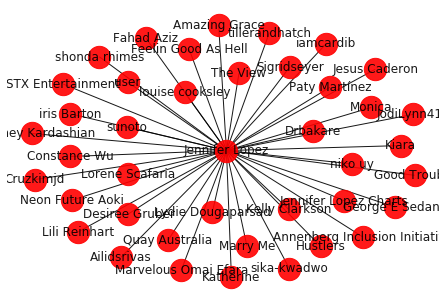

In [24]:
# userId 15846407 (Jennifer Lopez)

user_id = 85603854

user = data = get_user_data(user_id);

#get network
friends,followers = get_network(user)

#plot network
network(friends,followers)

## Solution 1.4

In [30]:
texas_weather_keyword = ['Texas','weather']
geolocation = [-86.33,41.63,-86.20,41.74] #geographic region around South Bend
lang =['en']

api = authenticate(CONSUMER_KEY,CONSUMER_SECRET,ACCESS_TOKEN,ACCESS_TOKEN_SECRET)


class Listener(StreamListener):
    
    def __init__(self,output_file=sys.stdout):
        self.num_tweets = 0
        
        super(Listener, self).__init__()  
        self.output_file = output_file
    
    def on_status(self, status):        
        if self.num_tweets < 100:
            print(status.text,file=self.output_file)
            self.num_tweets += 1
            print('Tweet '+ str(self.num_tweets) + ' dumped to file')
            return True
        else:
            return False
            
    def on_error(self, status_code):
        if status_code == 420:
            return False


file = 'tweets_keyword.json';
output = open(file, 'a',encoding="utf-8")
ln = Listener(output_file=output)
stream = Stream(auth=api.auth, listener=ln)

try:    
    stream.filter(track=texas_weather_keyword)
finally:
    
    output.close()

Tweet 1 dumped to file
Tweet 2 dumped to file
Tweet 3 dumped to file
Tweet 4 dumped to file
Tweet 5 dumped to file
Tweet 6 dumped to file
Tweet 7 dumped to file
Tweet 8 dumped to file
Tweet 9 dumped to file
Tweet 10 dumped to file
Tweet 11 dumped to file
Tweet 12 dumped to file
Tweet 13 dumped to file
Tweet 14 dumped to file
Tweet 15 dumped to file
Tweet 16 dumped to file
Tweet 17 dumped to file
Tweet 18 dumped to file
Tweet 19 dumped to file
Tweet 20 dumped to file
Tweet 21 dumped to file
Tweet 22 dumped to file
Tweet 23 dumped to file
Tweet 24 dumped to file
Tweet 25 dumped to file
Tweet 26 dumped to file
Tweet 27 dumped to file
Tweet 28 dumped to file
Tweet 29 dumped to file
Tweet 30 dumped to file
Tweet 31 dumped to file
Tweet 32 dumped to file
Tweet 33 dumped to file
Tweet 34 dumped to file
Tweet 35 dumped to file
Tweet 36 dumped to file
Tweet 37 dumped to file
Tweet 38 dumped to file
Tweet 39 dumped to file
Tweet 40 dumped to file
Tweet 41 dumped to file
Tweet 42 dumped to file
T

In [31]:
# Geolocation

file = 'tweets_geolocation.json';
output = open(file, 'a',encoding="utf-8")
ln1 = Listener(output_file=output)
stream = Stream(auth=api.auth, listener=ln1)

try:    
    stream.filter(locations=geolocation)
finally:
    
    output.close()

Tweet 1 dumped to file
Tweet 2 dumped to file
Tweet 3 dumped to file
Tweet 4 dumped to file
Tweet 5 dumped to file
Tweet 6 dumped to file
Tweet 7 dumped to file
Tweet 8 dumped to file
Tweet 9 dumped to file
Tweet 10 dumped to file
Tweet 11 dumped to file
Tweet 12 dumped to file
Tweet 13 dumped to file
Tweet 14 dumped to file
Tweet 15 dumped to file
Tweet 16 dumped to file
Tweet 17 dumped to file
Tweet 18 dumped to file
Tweet 19 dumped to file
Tweet 20 dumped to file
Tweet 21 dumped to file
Tweet 22 dumped to file
Tweet 23 dumped to file
Tweet 24 dumped to file
Tweet 25 dumped to file
Tweet 26 dumped to file
Tweet 27 dumped to file
Tweet 28 dumped to file
Tweet 29 dumped to file
Tweet 30 dumped to file
Tweet 31 dumped to file
Tweet 32 dumped to file
Tweet 33 dumped to file
Tweet 34 dumped to file
Tweet 35 dumped to file
Tweet 36 dumped to file
Tweet 37 dumped to file
Tweet 38 dumped to file
Tweet 39 dumped to file
Tweet 40 dumped to file
Tweet 41 dumped to file
Tweet 42 dumped to file
T

In [32]:
# #UNT from July 20 to July 28 2019

# tweets = Cursor(api.search,q= hashtag,lang="en",since="2019-07-20",until="2019-07-28").items(100)
output= open('date_range_data.json','a',encoding="utf-8")

criteria = got.manager.TweetCriteria().setQuerySearch('#UNT')\
                                           .setSince("2019-07-20")\
                                           .setUntil("2019-07-28")\
                                           .setMaxTweets(100)

try:
    with output as f:
        tweet  = got.manager.TweetManager.getTweets(criteria)[0]
        f.write(tweet.text)
        print(tweet.text)

        for i in range(99):
            tweet  = got.manager.TweetManager.getTweets(criteria)[i]
            print(tweet.text)
            f.write(tweet.text)
    print("success")
finally:
    print()
    f.close()
    

#Really It’s all about the @gogamecocks Those the only H2O contaminants #UNT
#Really It’s all about the @gogamecocks Those the only H2O contaminants #UNT
#UNT23 #unt22 #unt21 #twu #UNT #dentonpic.twitter.com/5DHriJ4ZyE
Catching up on all these stories is awesome! Check out Jada Henderson's photos from her time abroad with @UNTanthropology in #Morocco: http://wke.lt/w/s/wOEPmI . #UNT #UNTabroad #UNTinMorocco
Student orgs and departments, the deadline to sign up for #MGF19 is approaching. Don't miss out on your chance to meet over 8,500 #UNT students! Info: http://studentactivities.unt.edu/mean-green-fling …pic.twitter.com/0PT8hluGzD
It’s #NationalDanceDay and we are looking forward to so many fun performances this season! #GMG #unt #northtexas #meangreenpic.twitter.com/cXKWG3ttk2
Take your art to another level at our glass painting workshop. Meet us in the Syndicate on Tuesday from 2pm-4pm for #UPCreations! #UNT pic.twitter.com/bTqOW7t22O
These guys make our job easy! #localbusinesspart

## The end of Question 1

# Question 2 starts below:

## Solution 2.1

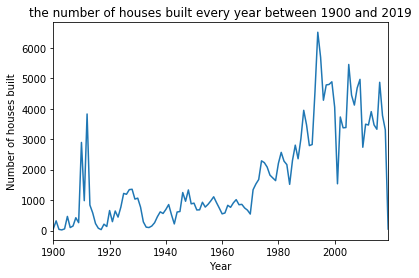

In [33]:
# Read data from  assignment_4_property_tax_report_2019.csv file
house_data = pd.read_csv("C:/assignment_4_property_tax_report_2019.csv")

# frequency count of years between
#house_data['YEAR_BUILT'].value_counts()
 #show the number of houses built every year between 1900 and 2019
house_built_1900_2019 = house_data.loc[(house_data["YEAR_BUILT"] >= 1900) & (house_data["YEAR_BUILT"] <= 2019),["YEAR_BUILT"]];
data = house_built_1900_2019['YEAR_BUILT'].value_counts().reset_index();
data.columns = ['Year', 'count']
data['Year'] = data['Year'].astype(int)
data.sort_values(by=['Year'],inplace = True)
start,end =data['Year'][::len(data['Year'])-1] 

# Line plot 

plt.plot(data['Year'],data['count'])
plt.xlabel('Year')
plt.ylabel('Number of houses built')
plt.title('the number of houses built every year between 1900 and 2019')
plt.xlim(start,end)
plt.show()



## Solution 2.2

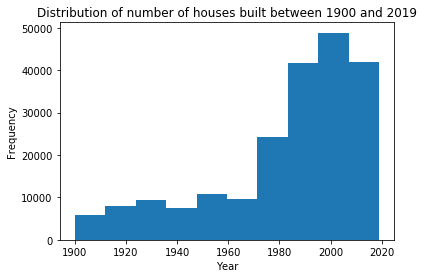

In [34]:
#Histogram to show the distribution of number of houses built
 # between 1900 and 2019.

plt.hist(data['Year'],bins=10,weights=data['count'])
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.title("Distribution of number of houses built between 1900 and 2019")

plt.show()
 



## Solution 2.3

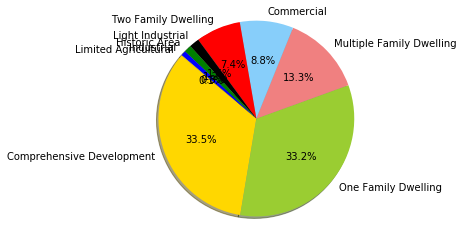

In [35]:
# Pie Chart to present the ratio of Top 8 zone categories of houses
#based on the “ZONE_CATEGORY” in the total number of houses.
 

categories_data = house_data['ZONE_CATEGORY'].value_counts().reset_index();
categories_data.columns = ["ZONE_CATEGORY","count"]

# Data to plot
labels = categories_data['ZONE_CATEGORY']
sizes = categories_data['count']

colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','red','black','green','blue']


# Plot
plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()



## Solution 2.4

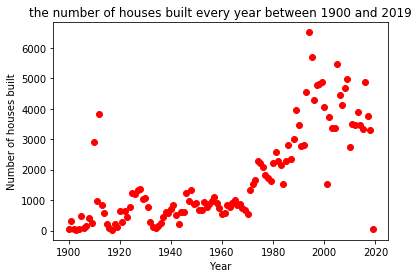

In [36]:
# Scatter Plot to show the number of houses built between 1900 and
#2019. (X-axis set as year and Y-axis set as number of houses built).
fig = plt.figure()
plt.scatter(data['Year'],data['count'],color='r')
plt.xlabel('Year')
plt.ylabel('Number of houses built') 
plt.title('the number of houses built every year between 1900 and 2019')
plt.show()



# The end of Question 2 and assignment 4. Yay!!!